<a href="https://colab.research.google.com/github/rubesala1983/Algoritmo_optimizacion/blob/main/Copy_of_v2_Seminario_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>       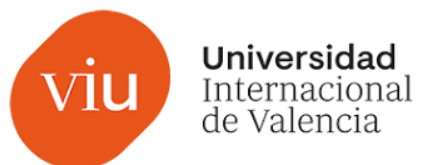


## Grupo 31    <br>
**Nombre y Apellidos:** <br>
Marina Riquelme Morell  <br>
Ruben Dario Salazar  Aya <br>

Url: https://github.com/rubesala1983/Algoritmo_optimizacion/blob/main/Copy_of_v2_Seminario_Algoritmos.ipynb <br>
Problema:
> 1. Sesiones de doblaje <br>

Descripción del problema:(copiar enunciado)

Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de doblaje
cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de grabación
independientemente del número de tomas que se graben. No es posible grabar más de 6 tomas por
día. El objetivo es planificar las sesiones por día de manera que el gasto por los servicios de los
actores de doblaje sea el menor posible







                                        

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




Respuesta

Para calcular el número total de combinaciones posibles sin restricciones, tenemos en cuenta  que cada una de las (T) tomas puede asignarse a uno de los (D) días. Debido que cada toma puede ser programada en cualquier día, y para esto el número total de combinaciones es:

$$\mathbf{D^T}$$

En este  ejercicio tenemos *T*=30 tomas y imaginemos  que queremos que se encuntre  en *D* = 6 días disponibles.
Cada toma puede ser asignada a cualquiera de los 6 días. porlo tanto , la cantidad de maneras en las que podemos asignar las tomas es:

$$6^{30}$$


Es decir que hay 221.073.919.720.733.357.899.776 formas  de distribuir las 30 tomas en los 6 días,obviamente  sin tener en cuenta las restricciones como la cantidad de actores disponibles o el límite de tomas por día.

Si tenemos en cuenta  las restricciones, las posibilidades se reducen. Esto se debe a que cada toma debe asignarse exactamente a un solo día, sin permitir que se complete en cualquier otro. Además, no es posible programar más de 6 tomas por día. Con estas condiciones y teniendo en cuenta que las 30 tomas deben distribuirse en 5 días, con 6 tomas en cada uno, el número de formas posibles de realizar esta distribución es:

$$30! /(6!)^5 ≈ 1.37\times 10 ^{18}$$

Esta cantidad muchisimo  menor que las opciones sin restricciones. Además, cada toma está asociada  a un conjunto de actores, y un actor solo trabaja en un día si al menos una de sus tomas ha sido asignada a ese día. El objetivo es disminuir  al mínimo el número de días en que los actores que  deben participar.

Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Respuesta

Para resolver este problema de planificación de tomas de doblaje, las estructuras de datos  que mejor  se acomodan son las matrices y los diccionarios.
Esto debido a la combinatoria del problema, en la que las relaciones entre tomas y actores  se deben organizarse de  la mejora manera  para facilitar el análisis como  la asignación.

En otras palabras, si definimos A como una matriz binaria que representa la relación entre las tomas y los actores, entonces tendremos que 𝐴𝑖,𝑗=1  cuando el actor 𝑗 participa en la toma 𝑖, y 𝐴,𝑗=0  en caso contrario.


$$ A = \begin{bmatrix}
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
1 & 1 & 0 & 0 \\
\end{bmatrix}$$  

Por ejemplo, en la primera toma participan los actores 1 y 3 en la segunda, los actores 2 y 4 y en la tercera, los actores 1 y 2. De esta manera se van estableciendo las combinaciones entre tomas y actores, hasta llegar a la representación general 𝑖,𝑗 (tomas, actores).

Podemos pensar en un diccionario como una herramienta útil para modelar las variables de optimización. Su ventaja es que nos permite acceder a las variables de manera rápida y sencilla, además de manejar grandes cantidades de combinaciones posibles sin perder eficiencia. En otras palabras, los diccionarios facilitan la organización y el control de la información, lo que resulta clave en este tipo de problemas.

Imaginemos que construimos un diccionario llamado X, donde cada entrada tiene la forma (𝑡,𝑑):𝑣𝑎𝑙𝑜𝑟. Aquí, 𝑡 representa el número de la toma y 𝑑 el día en el que podría asignarse. El campo valor nos indica si la toma está efectivamente asignada a ese día: será 1  si lo está y 0  en caso contrario.

Esto significa que, para cada combinación de toma y día, definimos una variable binaria que indica si esa toma se realiza en ese día. Sin embargo, este diccionario no estaría completo, ya que aún falta incorporar la información de los actores. Por ello, se crearía un segundo diccionario que señale si un actor trabaja en un día determinado.

Cada entrada en Y tendría la forma (𝑎,𝑑):𝑣𝑎𝑙𝑜𝑟,donde 𝑎 orresponde al número del actor y 𝑑 al día. El campo valor, igual que antes, será 1 si el actor trabaja ese día y 0 si no lo hace.

Este diccionario nos permite calcular fácilmente cuántos días trabaja cada actor y, a partir de ello, buscar la manera de reducir al mínimo ese número dentro de nuestro problema.

In [ ]:
X = {
    (t, d): LpVariable(f"x_{t}_{d}", cat=LpBinary)
    for t in range(T)
    for d in range(D)
    }
Y = {
    (a, d): LpVariable(f"y_{a}_{d}", cat=LpBinary)
    for a in range(A_actors)
    for d in range(D)
    }

Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta

La función objetivo de este modelo buscamos reducir al mínimo el número total de días en que los actores deben trabajar. En términos matemáticos, esto se expresa de la siguiente manera:

$$min\sum_{a=1}^{A}\sum_{d=1}^{D}y_{a,d}$$

aqui representamos  $y_{a,d}$ es una variable binaria que indica si el actor $a$ trabaja en el día $d$. $A$ es el número total de actores y $D$ es el número máximo de días posibles para realizar las tomas.

hagamos de cuenta que en nuestro ejemplo tenemos 10 actores y 30 tomas que deben distribuirse en un máximo de 5 días. Si la planificación se organiza de tal manera que cada actor trabaja en total 3 días, entonces la función objetivo reflejaría ese resultado de la siguiente forma:

$$min\sum_{a=1}^{10}\sum_{d=1}^{5}y_{a,d} = 3 \times 10 = 30$$

Ahora bien, si logramos una planificación más eficiente en la que cada actor solo trabaje 2 días en total, la función objetivo se reduciría de la siguiente manera:

$$min\sum_{a=1}^{10}\sum_{d=1}^{5}y_{a,d} = 2 \times 10 = 20$$

En resumen, la función objetivo busca minimizar este valor. La solución óptima será aquella que logre distribuir las tomas de manera eficiente, de modo que los actores trabajen el menor número de días posible.

**Diseña un algoritmo para resolver el problema por fuerza bruta**

implementamos  un algoritmo de fuerza bruta para encontrar la mejor manera de agrupar las tomas en los distintos días, buscando minimizar la cantidad de jornadas en las que los actores deben trabajar. Para lograrlo, se utiliza itertools.permutations, una herramienta que genera todas las combinaciones posibles de las tomas y permite evaluar cuál distribución consigue reducir al mínimo el número de días trabajados.

In [ ]:
from itertools import permutations
import numpy as np

A = np.array([
    [1,1,1,1,1,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,0,0],
    [0,1,0,0,1,0,1,0,0,0],
    [1,1,0,0,0,0,1,1,0,0],
    [0,1,0,1,0,0,0,1,0,0],
    [1,1,0,1,1,0,0,0,0,0],
    [1,1,0,1,1,0,0,0,0,0],
    [1,1,0,0,0,1,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,0],
    [1,1,0,0,0,1,0,0,1,0],
    [1,1,1,0,1,0,0,1,0,0],
    [1,1,1,1,0,1,0,0,0,0],
    [1,0,0,1,1,0,0,0,0,0],
    [1,0,1,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,1,0,0,0],
    [0,0,0,1,0,0,0,0,0,1],
    [1,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0],
    [1,0,1,1,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,1,0,0],
    [1,1,1,1,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,1],
    [1,0,1,0,1,0,0,0,1,0],
    [0,0,0,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0],
    [1,0,0,0,1,1,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0],
])

T, A_actors = A.shape  # Número de tomas y actores
D = (T + 5) // 6  # Número máximo de días (se divide por 6 ya que no pueden grabarse más de 6 tomas por día)

# Algoritmo de fuerza bruta para minimizar los días trabajados por actores
def brute_force_schedule():
    min_days = float('inf')
    best_schedule = None

    for perm in permutations(range(T)):
        temp_schedule = {d: [] for d in range(D)}
        temp_actors_per_day = {d: set() for d in range(D)}

        for i, t in enumerate(perm):
            d = i // 6
            temp_schedule[d].append(t + 1)
            for a in range(A_actors):
                if A[t, a] == 1:
                    temp_actors_per_day[d].add(a + 1)

        total_days = sum(1 for d in temp_actors_per_day if temp_actors_per_day[d])
        if total_days < min_days:
            min_days = total_days
            best_schedule = temp_schedule

    return best_schedule

# Ejecutar el algoritmo de fuerza bruta
brute_force_result = brute_force_schedule()
if brute_force_result:
    for d in sorted(brute_force_result.keys()):
        if brute_force_result[d]:
            print(f"Día {d+1}")
            print(f"Tomas: {brute_force_result[d]}")
            print()

**Calcula la complejidad del algoritmo por fuerza bruta**

Para calcular La complejidad computacional del algoritmo de fuerza bruta puede entenderse de la siguiente manera:

Primero, pensemos en la generación de asignaciones. Cada una de las
𝑇 tomas puede ubicarse en cualquiera de los 𝐷 días, lo que significa que existen en total $D^T$  posibles asignaciones. En el peor escenario, cuando
𝐷=𝑇 (es decir, un día para cada toma, el máximo posible), el número de asignaciones es:

$$T^T$$

Sin embargo Respecto a las restricciones debemos tener  en cuenta que para cada asignación, hay que coroborrar  que no haya más de $M$ tomas en ningún día , se recorre las tomas  $O(T)$.

Además, los actores deben estar presentes en los días en que se graban las tomas en las que participan. Esto significa que, para cada toma, hay que revisar todos los actores, lo que da un coste de $O(T\cdot A)$, donde 𝐴 es el número de actores. Este es el coste de comprobar una sola asignación.

En conclusión, existen $T^T$ asignaciones y cada una requiere $O(T\cdot A)$ operaciones para verificarse. Por lo tanto, la complejidad total del algoritmo es:

$$O(T^T \cdot T\cdot A) = O(T^{T+1} \cdot A)$$


(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

En nuestro caso para optmizar  la complejidad del algoritmo de fuerza bruta, vamos a utlizar  un algoritmo voraz. Este tipo de algoritmo busca obtener el mejor resultado inmediato en cada paso, sin evaluar todas las consecuencias futuras. En otras palabras, se trata de una solución heurística: puede ofrecer buenas respuestas, aunque no garantiza que sean las óptimas.

Aun así, utilizaremos  tambien PLE como referencia para comparar los resultados obtenidos con el algoritmo propuesto y evaluar su desempeño.

In [25]:
import numpy as np

A = np.array([
    [1,1,1,1,1,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,0,0],
    [0,1,0,0,1,0,1,0,0,0],
    [1,1,0,0,0,0,1,1,0,0],
    [0,1,0,1,0,0,0,1,0,0],
    [1,1,0,1,1,0,0,0,0,0],
    [1,1,0,1,1,0,0,0,0,0],
    [1,1,0,0,0,1,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,0],
    [1,1,0,0,0,1,0,0,1,0],
    [1,1,1,0,1,0,0,1,0,0],
    [1,1,1,1,0,1,0,0,0,0],
    [1,0,0,1,1,0,0,0,0,0],
    [1,0,1,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,1,0,0,0],
    [0,0,0,1,0,0,0,0,0,1],
    [1,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0],
    [1,0,1,1,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,1,0,0],
    [1,1,1,1,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,1],
    [1,0,1,0,1,0,0,0,1,0],
    [0,0,0,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0],
    [1,0,0,0,1,1,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0],
])

# Extraemos las dimensiones de la matriz: filas = tomas, columnas = actores
T, A_actors = A.shape
# Límite de tomas permitidas en una jornada de grabación
M = 6
# Calculamos cuántos días se necesitan como mínimo para cubrir todas las tomas
D = (T + M - 1) // M

# Función que asigna tomas a días buscando minimizar actores nuevos por jornada
def algoritmo_voraz():
    # Creamos un diccionario vacío para almacenar qué tomas se graban cada día
    planificacion = {dia: [] for dia in range(D)}

    # Tabla para rastrear en qué días participa cada actor (0 = ausente, 1 = presente)
    actores_trabajando = [[0] * D for _ in range(A_actors)]

    # Contador de tomas asignadas a cada día
    tomas_por_dia = [0] * D

    # Registro para saber si cada toma ya fue programada
    tomas_asignadas = [False] * T

    # Recorremos todas las tomas una por una
    for toma in range(T):
        mejor_dia = None  # Variable para guardar el día más conveniente
        min_nuevos_actores = float('inf')  # Valor inicial muy alto para comparar

        # Revisamos cada día como candidato para esta toma
        for dia in range(D):
            # Solo consideramos días que aún tengan espacio disponible
            if tomas_por_dia[dia] < M:
                nuevos_actores = 0  # Acumulador de actores que habría que agregar ese día

                # Verificamos actor por actor
                for actor in range(A_actors):
                    # Si el actor es necesario en esta toma y aún no está asignado a ese día
                    if A[toma, actor] == 1 and actores_trabajando[actor][dia] == 0:
                        nuevos_actores += 1  # Sumamos uno al conteo de actores adicionales

                # Nos quedamos con el día que requiera traer menos actores extras
                if nuevos_actores < min_nuevos_actores:
                    min_nuevos_actores = nuevos_actores
                    mejor_dia = dia  # Actualizamos el mejor día encontrado

        # Si encontramos un día válido, asignamos la toma
        if mejor_dia is not None:
            planificacion[mejor_dia].append(toma)  # Agregamos la toma al día elegido
            tomas_por_dia[mejor_dia] += 1  # Incrementamos el contador de tomas del día
            tomas_asignadas[toma] = True  # Registramos que esta toma ya fue cubierta

            # Actualizamos la presencia de cada actor involucrado en esa jornada
            for actor in range(A_actors):
                if A[toma, actor] == 1:
                    actores_trabajando[actor][mejor_dia] = 1

    # Devolvemos el calendario completo y la tabla de presencia de actores
    return planificacion, actores_trabajando

# Lanzamos el algoritmo voraz
planificacion, actores_trabajando = algoritmo_voraz()

# Imprimimos la agenda resultante día por día
if planificacion:
    for dia in sorted(planificacion.keys()):
        if planificacion[dia]:
            print(f"Día {dia+1}")
            print(f"Tomas: {[toma+1 for toma in planificacion[dia]]}")
            actores_en_dia = [actor+1 for actor in range(A_actors) if actores_trabajando[actor][dia] == 1]
            print(f"Actores implicados: {actores_en_dia}")
            print()

Día 1
Tomas: [1, 2, 3, 4, 5, 6]
Actores implicados: [1, 2, 3, 4, 5, 7, 8]

Día 2
Tomas: [7, 8, 9, 10, 11, 12]
Actores implicados: [1, 2, 3, 4, 5, 6, 8, 9]

Día 3
Tomas: [13, 14, 15, 16, 17, 18]
Actores implicados: [1, 2, 3, 4, 5, 6, 7, 10]

Día 4
Tomas: [19, 20, 21, 22, 23, 24]
Actores implicados: [1, 2, 3, 4, 5, 6, 8]

Día 5
Tomas: [25, 26, 27, 28, 29, 30]
Actores implicados: [1, 2, 3, 4, 5, 6, 9, 10]



**Nuestro resultado** : Este algoritmo voraz ofrece una mejora importante frente al enfoque de fuerza bruta porque:

Asigna cada toma una sola vez, sin necesidad de explorar todas las combinaciones posibles.

Para cada toma, busca de manera local el mejor día, es decir, aquel que implique activar la menor cantidad de actores nuevos.

Toma decisiones rápidas y no retrocede, lo que agiliza el proceso.

Cumple siempre con las restricciones establecidas, como el límite de 6 tomas por día.

Gracias a esta estrategia, se evita recorrer el espacio completo de soluciones, llegando a una respuesta eficiente sin necesidad de probar todas las alternativas.



**Algoritmo PLE:** Ahora vamos a utilizar un algoritmo de Programación Lineal Entera (PLE), únicamente con fines comparativos. Tal como se explica en la guía, un problema de programación lineal busca maximizar o minimizar una función objetivo lineal, siempre sujeto a un conjunto de restricciones de igualdad o desigualdad.

Este enfoque encaja perfectamente con el problema que queremos resolver: aunque el método de fuerza bruta podría encontrar la solución, su complejidad computacional lo hace inviable para ejecutarlo múltiples veces en distintos escenarios. En cambio, al tratarse de un problema donde todas las variables son enteras, se considera un caso puro de programación lineal entera.

Para implementarlo, haremos uso del paquete PuLP, que permite formular y resolver problemas tanto de optimización lineal como de programación lineal entera de manera práctica y eficiente.

In [27]:
!pip install pulp

from pulp import LpProblem, LpVariable, lpSum, LpMinimize, LpBinary
import numpy as np

# Matriz de participación: filas = tomas, columnas = actores
# El valor 1 significa que ese actor interviene en esa toma
A = np.array([
    [1,1,1,1,1,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,0,0],
    [0,1,0,0,1,0,1,0,0,0],
    [1,1,0,0,0,0,1,1,0,0],
    [0,1,0,1,0,0,0,1,0,0],
    [1,1,0,1,1,0,0,0,0,0],
    [1,1,0,1,1,0,0,0,0,0],
    [1,1,0,0,0,1,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,0],
    [1,1,0,0,0,1,0,0,1,0],
    [1,1,1,0,1,0,0,1,0,0],
    [1,1,1,1,0,1,0,0,0,0],
    [1,0,0,1,1,0,0,0,0,0],
    [1,0,1,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,1,0,0,0],
    [0,0,0,1,0,0,0,0,0,1],
    [1,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0],
    [1,0,1,1,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,1,0,0],
    [1,1,1,1,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,1],
    [1,0,1,0,1,0,0,0,1,0],
    [0,0,0,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0],
    [1,0,0,0,1,1,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0],
])

T, A_actors = A.shape  # Obtenemos la cantidad de tomas y de actores
D = (T + 5) // 6  # Estimamos el número máximo de jornadas, con un tope de 6 tomas por jornada

# Creamos el modelo de programación lineal entera con objetivo de minimización
prob = LpProblem("Minimizar_Costos_Doblaje", LpMinimize)

# Variable binaria: x[t,d] vale 1 si la toma t se programa en el día d
x = LpVariable.dicts("x", [(t, d) for t in range(T) for d in range(D)], cat=LpBinary)
# Variable binaria: y[a,d] vale 1 si el actor a debe presentarse el día d
y = LpVariable.dicts("y", [(a, d) for a in range(A_actors) for d in range(D)], cat=LpBinary)

# Cada toma debe quedar asignada exactamente a un solo día
for t in range(T):
    prob += lpSum(x[(t, d)] for d in range(D)) == 1

# En ningún día se pueden grabar más de 6 tomas
for d in range(D):
    prob += lpSum(x[(t, d)] for t in range(T)) <= 6

# Si alguna toma asignada a un día requiere a un actor, ese actor debe estar presente ese día
for a in range(A_actors):
    for d in range(D):
        prob += lpSum(A[t, a] * x[(t, d)] for t in range(T)) <= y[(a, d)] * T

# Objetivo: reducir al mínimo la suma total de presencias de actores en todos los días
prob += lpSum(y[(a, d)] for a in range(A_actors) for d in range(D))

# Ejecutamos el solver para encontrar la solución óptima
prob.solve()

# Organizamos los resultados en estructuras legibles
schedule = {d: [] for d in range(D)}  # Guardará las tomas de cada día
actors_per_day = {d: set() for d in range(D)}  # Guardará los actores presentes cada día

for t in range(T):
    for d in range(D):
        if x[(t, d)].varValue == 1:  # Si esta toma fue asignada a este día
            schedule[d].append(t + 1)  # Registramos la toma con numeración desde 1
            for a in range(A_actors):
                if A[t, a] == 1:  # Si el actor participa en la toma
                    actors_per_day[d].add(a + 1)  # Lo registramos con numeración desde 1

# Mostramos el calendario óptimo resultante
for d in sorted(schedule.keys()):
    if schedule[d]:  # Solo imprimimos días que tengan tomas asignadas
        print(f"Para Día {d+1}")
        print(f"Para Tomas: {schedule[d]}")
        print(f"Los Actores implicados: {sorted(actors_per_day[d])}\n")

Para Día 1
Para Tomas: [6, 7, 9, 13, 16, 25]
Los Actores implicados: [1, 2, 4, 5, 10]

Para Día 2
Para Tomas: [3, 4, 8, 10, 15, 29]
Los Actores implicados: [1, 2, 5, 6, 7, 8, 9]

Para Día 3
Para Tomas: [1, 5, 11, 12, 21, 22]
Los Actores implicados: [1, 2, 3, 4, 5, 6, 8]

Para Día 4
Para Tomas: [14, 17, 18, 19, 23, 24]
Los Actores implicados: [1, 3, 6]

Para Día 5
Para Tomas: [2, 20, 26, 27, 28, 30]
Los Actores implicados: [1, 3, 4, 5, 9]



El algoritmo de Programación Lineal Entera (PLE) logra encontrar una solución óptima en muy poco tiempo. Sin embargo, a diferencia del enfoque voraz, no tenemos la posibilidad de controlar cómo funciona su proceso interno: el PLE sigue su propio camino de optimización, mientras que en el algoritmo voraz sí podemos ajustar y dirigir las decisiones paso a paso.

(*)Calcula la complejidad del algoritmo

Respuesta

El algoritmo voraz organiza las tomas de manera que cada jornada de grabación sea lo más eficiente posible. Su objetivo es reducir al mínimo la incorporación de nuevos actores en cada día de rodaje, lo que facilita la logística y optimiza recursos.

Por lo tanto , la complejidad computacional del proceso la podemos  expresar de la siguiente forma:

Se consideran hasta $D$ días disponibles, donde $D \cong T/6$  ya que en un mismo día pueden programarse como máximo 6 tomas.

En cada día, se revisa el conjunto de $A$ actores para determinar cuántos ctores nuevos se activarían si esa toma se asigna allí.

De esta manera, la complejidad de procesar una sola toma es:

$$O(D \times A)$$

Y al extenderlo a todas las tomas, la complejidad total resulta:

$$O(T \times D \times A)$$

En nuestro caso particular, el número de días $D$  está en el orden de $T/6$,Esto significa que, aunque proporcionalmente  $D=O(T)$,  en la práctica resulta mucho más pequeño debido a la cantidad de datos que manejamos.

El número de actores $A=10$ es relativamente bajo y, además, constante respecto a $T$. Si consideramos que tanto $A$  como $M$  permanecen fijos, la complejidad práctica se aproxima a:

$$O(T^2)$$

En otras palabras, el nivel de complejidad depende directamente de tres factores: los actores, los días y las tomas. Cuanto mayores sean estos valores, más costoso será el cálculo.

Lo importante es que, aun así, este enfoque representa una mejora sustancial frente al método de fuerza bruta, cuya complejidad crece de manera exponencial con $T$. Aquí logramos reducir el problema a una escala cuadrática, mucho más manejable.




**Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios**


En este nuevo escenario vamos a ajustar los parámetros: trabajaremos con 20 tomas, involucrando únicamente 5 actores, distribuidos en un máximo de 5 días.

Además, se incorpora una semilla para garantizar la reproducibilidad de los resultados, es decir, que el experimento pueda repetirse bajo las mismas condiciones y obtener siempre el mismo comportamiento.

In [28]:
import numpy as np

# Cantidad de tomas y actores que tendrá nuestro problema
num_tomas = 20
num_actores = 5

# Construimos una matriz binaria aleatoria donde cada celda tiene un 50% de ser 1
# La semilla fija garantiza que los resultados sean siempre los mismos
np.random.seed(42)
A = (np.random.rand(num_tomas, num_actores) < 0.5).astype(int)

T, A_actors = A.shape  # Extraemos las dimensiones: tomas (filas) y actores (columnas)
D = (T + 5) // 5  # Calculamos el máximo de jornadas posibles, con un límite de 5 tomas por jornada

A #20 tomas(filas) , 5 actores(columnas)

array([[1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0],
       [1, 0, 0, 1, 1],
       [1, 1, 0, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 1, 0, 0, 1],
       [0, 1, 1, 0, 0],
       [0, 1, 1, 0, 1],
       [1, 1, 1, 0, 1],
       [0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1],
       [0, 1, 0, 1, 0],
       [0, 1, 1, 0, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 1, 1, 1]])

**Aplica el algoritmo al juego de datos generado**


Respuesta

Con estos nuevos datos vamos a repetir el mismo procedimiento, aplicando los algoritmos que se definieron en la actividad.

**Algoritmo Voraz**

In [30]:
# Lanzamos el algoritmo voraz y recibimos la planificación junto con la tabla de presencia
planificacion, actores_trabajando = algoritmo_voraz()

# Recorremos los días en orden para mostrar el calendario resultante
if planificacion:
    for dia in sorted(planificacion.keys()):
        if planificacion[dia]:  # Solo mostramos días que tengan tomas programadas
            print(f"Para el Día {dia+1}")
            print(f"Para las Tomas: {[toma+1 for toma in planificacion[dia]]}")  # Ajustamos el índice para que empiece en 1
            actores_en_dia = [actor+1 for actor in range(A_actors) if actores_trabajando[actor][dia] == 1]  # Identificamos qué actores están presentes ese día
            print(f"Para los Actores implicados: {actores_en_dia}")
            print()  # Separador visual entre jornadas

Para el Día 1
Para las Tomas: [1, 2, 3, 4, 5, 6]
Para los Actores implicados: [1, 2, 3, 4, 5]

Para el Día 2
Para las Tomas: [7, 8, 9, 10, 11, 12]
Para los Actores implicados: [1, 2, 3, 4, 5]

Para el Día 3
Para las Tomas: [13, 14, 15, 16, 17, 18]
Para los Actores implicados: [1, 2, 3, 4, 5]

Para el Día 4
Para las Tomas: [19, 20]
Para los Actores implicados: [1, 3, 4, 5]



***Para el caso con Algoritmo PLE:***

In [32]:
from pulp import LpProblem, LpVariable, lpSum, LpMinimize, LpBinary

# Creamos el modelo de optimización con el objetivo de minimizar costos
prob = LpProblem("Minimizar_Costos_Doblaje", LpMinimize)

# Variable binaria que indica si la toma t se graba en el día d
x = LpVariable.dicts("x", [(t, d) for t in range(T) for d in range(D)], cat=LpBinary)
# Variable binaria que indica si el actor a debe asistir el día d
y = LpVariable.dicts("y", [(a, d) for a in range(A_actors) for d in range(D)], cat=LpBinary)

# Toda toma debe estar programada en exactamente un día
for t in range(T):
    prob += lpSum(x[(t, d)] for d in range(D)) == 1

# Cada jornada admite como máximo 6 tomas
for d in range(D):
    prob += lpSum(x[(t, d)] for t in range(T)) <= 6

# Si un actor aparece en alguna toma de un día, debe estar marcado como presente ese día
for a in range(A_actors):
    for d in range(D):
        prob += lpSum(A[t, a] * x[(t, d)] for t in range(T)) <= y[(a, d)] * T

# El objetivo es reducir al mínimo el total de asistencias de actores a lo largo de todos los días
prob += lpSum(y[(a, d)] for a in range(A_actors) for d in range(D))

# Ejecutamos el solver para obtener la solución óptima
prob.solve()

# Estructuramos los resultados en diccionarios para facilitar la lectura
schedule = {d: [] for d in range(D)}  # Almacenará las tomas programadas por día
actors_per_day = {d: set() for d in range(D)}  # Almacenará los actores requeridos por día

for t in range(T):
    for d in range(D):
        if x[(t, d)].varValue == 1:  # Verificamos si esta toma quedó asignada a este día
            schedule[d].append(t + 1)  # Guardamos la toma con numeración desde 1
            for a in range(A_actors):
                if A[t, a] == 1:  # Si el actor interviene en esa toma
                    actors_per_day[d].add(a + 1)  # Lo añadimos al conjunto del día, numerado desde 1

# Mostramos el calendario final con las tomas y actores de cada jornada
for d in sorted(schedule.keys()):
    if schedule[d]:  # Solo imprimimos jornadas que tengan tomas asignadas
        print(f"Para el Día {d+1}")
        print(f"Para las Tomas: {schedule[d]}")
        print(f"Para los Actores implicados: {sorted(actors_per_day[d])}\n")

Para el Día 1
Para las Tomas: [1, 2, 6, 18, 19]
Para los Actores implicados: [1, 2, 5]

Para el Día 2
Para las Tomas: [3, 4, 9, 12, 13, 20]
Para los Actores implicados: [1, 2, 3, 4, 5]

Para el Día 3
Para las Tomas: [7, 11, 15]
Para los Actores implicados: [2, 3]

Para el Día 5
Para las Tomas: [5, 8, 10, 14, 16, 17]
Para los Actores implicados: [2, 3, 4, 5]



Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

Cedeño Zurita, C. A. (2012). Algoritmos para problemas de programación de tareas en entornos de producción flexibles (Tesis de grado). Escuela Politécnica Nacional, Quito. https://bibdigital.epn.edu.ec/bitstream/15000/2464/1/CD-3170.pdf

Reyero, R. (s.f.). Algoritmos de Optimización. Universidad VIU. Recuperado de
https://learn.universidadviu.com/courses/1/2024_10_C_50688/content/_7473597_1/resources/03miar_rreyero.pdf

Sala, A. *Programación Lineal Entera*. Universitat de València. Recuperado de  
  [https://www.uv.es/~sala/Clase14.pdf](https://www.uv.es/~sala/Clase14.pdf)

Cameán Pérez, J. A., & Gómez-Coca, S. (2011). Optimización de la asignación de turnos de trabajo minimizando días de trabajo. X Congreso de la Sociedad Gallega para la Promoción de la Estadística e Investigación Operativa (SGAPEIO). https://www.sgapeio.es/descargas/congresos_SGAPEIO/xsgapeio.uvigo.es/resumenes/41_14_paper.pdf

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

El estudio abre varias líneas interesantes que se pueden explorar:

**Nuevas restricciones:** es decir incorporar el coste asociado a ciertos actores o su disponibilidad de tiempo. Incluso se podría simular escenarios donde un actor principal se sele presente alguna novedad  en un día específico, para observar cómo responde el algoritmo. Esto se asemeja a los llamados gemelos digitales que algunas compañías utilizan para probar distintos escenarios.

**Condiciones incrementales:** Establecer reglas adicionales, como que ciertos actores deben aparecer juntos en determinadas escenas (por ejemplo, que el actor 1 y el actor 2 siempre estén presentes al mismo tiempo).

**Exploración heurística:** Dado que la Programación Lineal Entera (PLE) es un problema NP-duro, se puede experimentar con métodos heurísticos que buscan soluciones “suficientemente buenas” en menos tiempo y con menor coste computacional. Una primera prueba podría ser el algoritmo genético, aprovechando sus mecanismos de crossover y mutación para generar soluciones alternativas de manera eficiente.